<h3><b>Introduction to Data Analytics - Exercise set 3 - seaborn-module and data exploration</b></h3>

Put all your exercises (Jupyter Notebook/Python-files) in your course Git-project.
Use either code comments or Jupyter Notebook markdown (text) to document which exercise you are doing and what a certain code section does! 

<h3 style="color: red;">NOTE! Answer the questions within the exercises either as code comments or markdown text.</h3>

<h4><b>1. In this exercise, use the 'penguins' dataset from seaborn! </b></h4>
<b>-> sns.load_dataset('penguins')
</b>


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [2]:
%load_ext numpy_html

In [3]:
%%html
<style>
table {margin-top: 16pt;}
td {font-family: Arial, Helvetica, sans-serif !important; font-weight: 600; white-space: normal !important;}
tr:nth-child(even) {background: #b0d9eb !important; color: black}
tr:nth-child(odd) {background: #8fb1bf !important; color: black}
</style>

In [4]:
# Load dataset penguins from seabron
penguins = sns.load_dataset('penguins')

<li>Data set name: penguins</li>
<li>Source: Seaborn module</li>
<li>Description: In this dataset there is information about penguins, this dataset tells us physical measurements based on certain criteria like species, island etc. These physical measurements are: bill length and depth, flipper length and body mass in grams.</li>
<li>This is quite small dataset, but there is a good amount of correlations and features we can use. I don't know, in my opinion there could be more, but I would say this is quite much all we need at this moment.</li>

<ul>
<li>Create a pair plot of the data</li>
<ul>
    <li style="color: red; font-weight: bold;">What correlations can you immediately see?</li>
    <li><b>Bonus extra task:</b> check out the correlation matrix for this dataset too</li>
</ul>
</ul>

What correlations can you immediately see?

Here we can see initial insights into the data. Genthoo is the biggest of penguin species in this dataframe. Even while being the biggest they have the lowest bill depth on average.

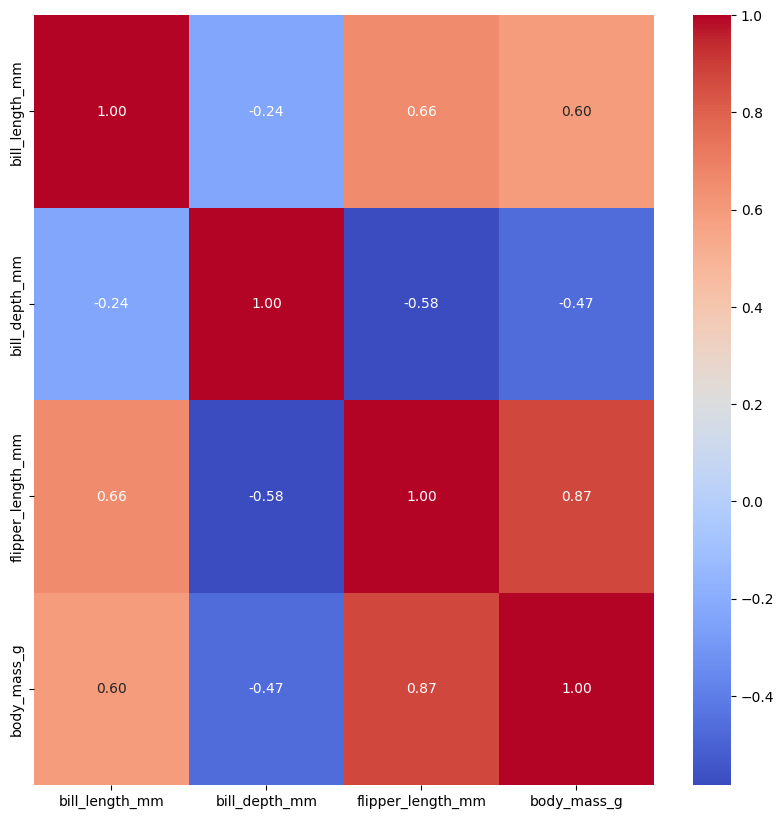

In [5]:
# Select numeric columns for computing correlation
numeric_columns = penguins.select_dtypes(include=['number'])

# Compute the correlation matrix
penguins_matrix = numeric_columns.corr()

# Plot the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(data=penguins_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Here we can see correlation between flipper, bill length and body mass, this means the bigger and heavier the penguin, bigger their flippers are on average. Bill depth is seems to have negative correlation with body mass and bill depth (even while body mass has -0.47, but almost -0.5 == high negative correlation).

Bonus extra task: check out the correlation matrix for this dataset too

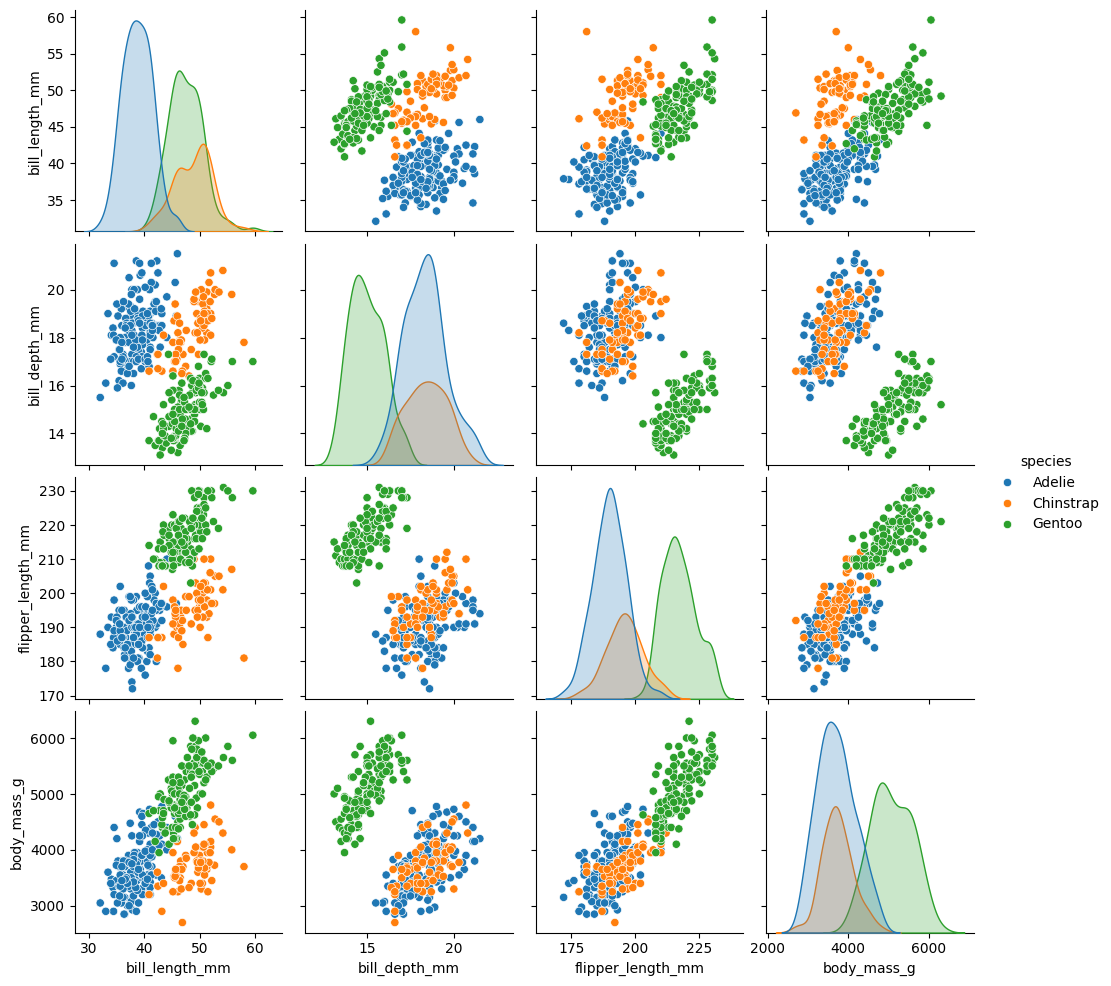

In [6]:
# Create pair plot
sns.pairplot(data=penguins, hue='species')

<li>Use hue for the "island" column, <span style="color: red; font-weight: bold;">what can you see in the data this way?</span></li>

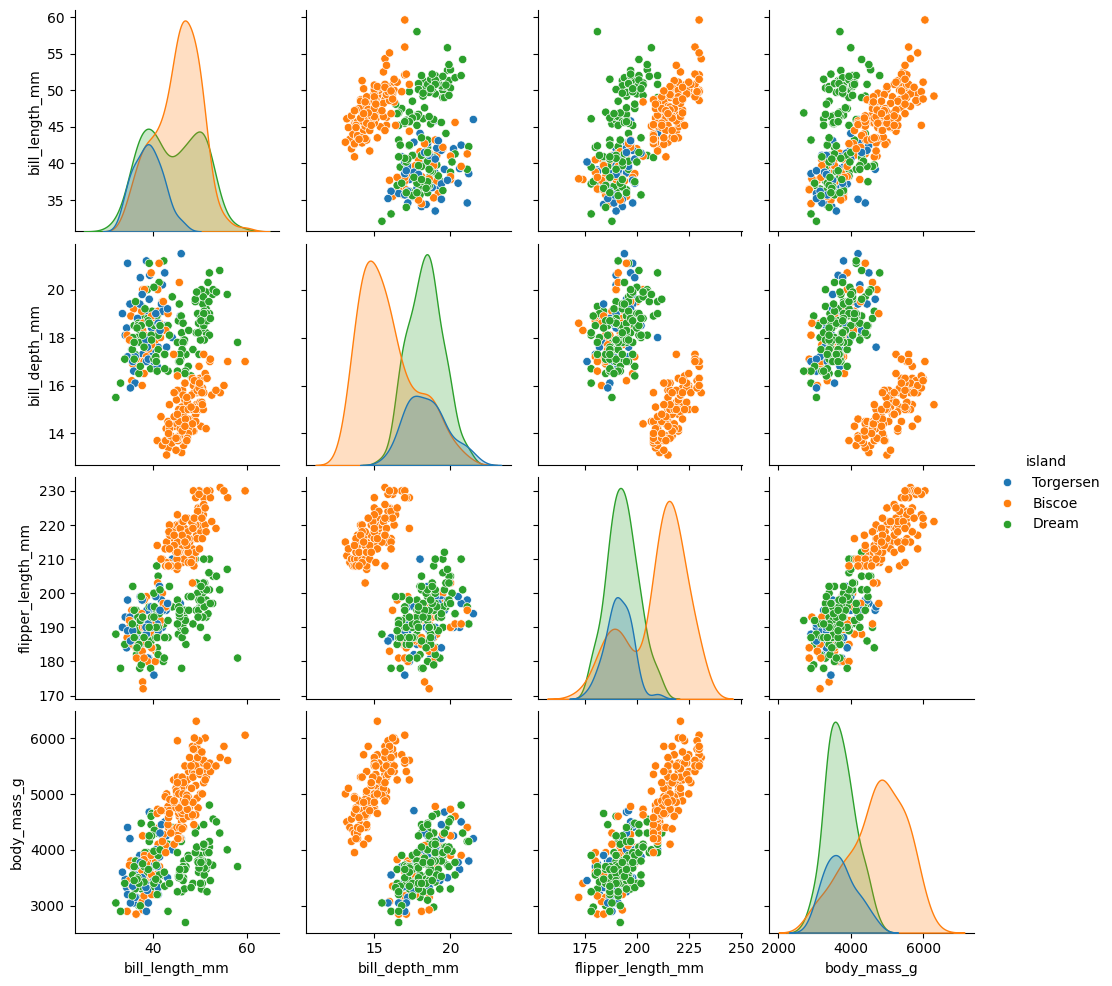

In [7]:
# Create pairplot hue island
sns.pairplot(data=penguins, hue='island')
plt.show()

Here we can see that penguins from Biscoe island are the largest on average, while having the smallest bill depth. Penguins from Torgensen island seem to be the smallest in general, while having the highest bill depth. Penguins from Dream island island seems to place between these two islands.

<ul>
    <li>Find the amount of penguins on each island by using pandas (<b>value_counts()</b>). <span style="color: red; font-weight: bold;">Which island is different compared to others?</span></li>
    <ul>
        <li><b>Small extra task:</b> visualize the counts with a bar plot</li>
    </ul>
</ul>

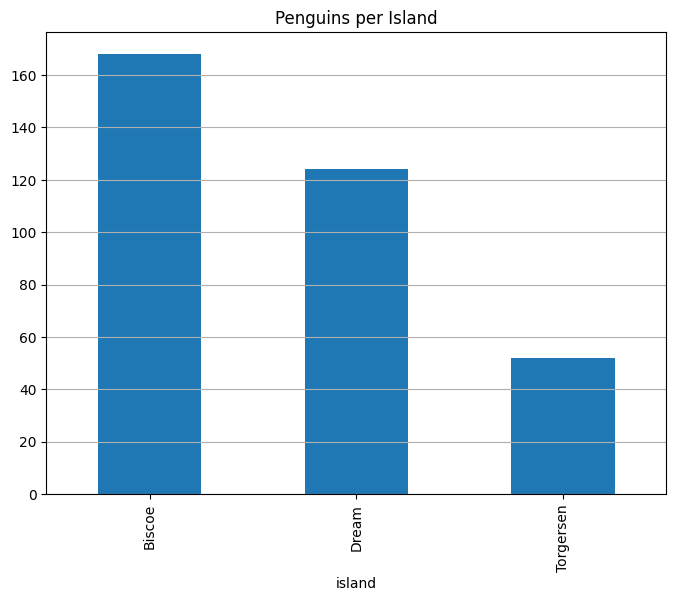

In [8]:
# Create sentence to count penguins on each island
penguins_per_island = penguins.value_counts('island')

# Create visualization for the user
plt.figure(figsize=(8, 6))
penguins_per_island.plot(kind='bar', x='island')
plt.title('Penguins per Island')
plt.grid(axis='y')
plt.show()

Which island is different compared to others?

Answer: Torgersen is different due to it being over 2x smaller than dream and over 5x smaller than Biscoe.

<ul>
    <li>Create now another pair plot, and use hue for the "species" –column</li>
    <ul>
        <li style="color: red; font-weight: bold;">Is there a difference in the distributions when using hue for the islands instead?</li>
        <li><b>Bonus task:</b> <span style="color: red; font-weight: bold;">How much does the "sex"-column affect the result?</span> (MALE / FEMALE)</li>
    </ul>
</ul>

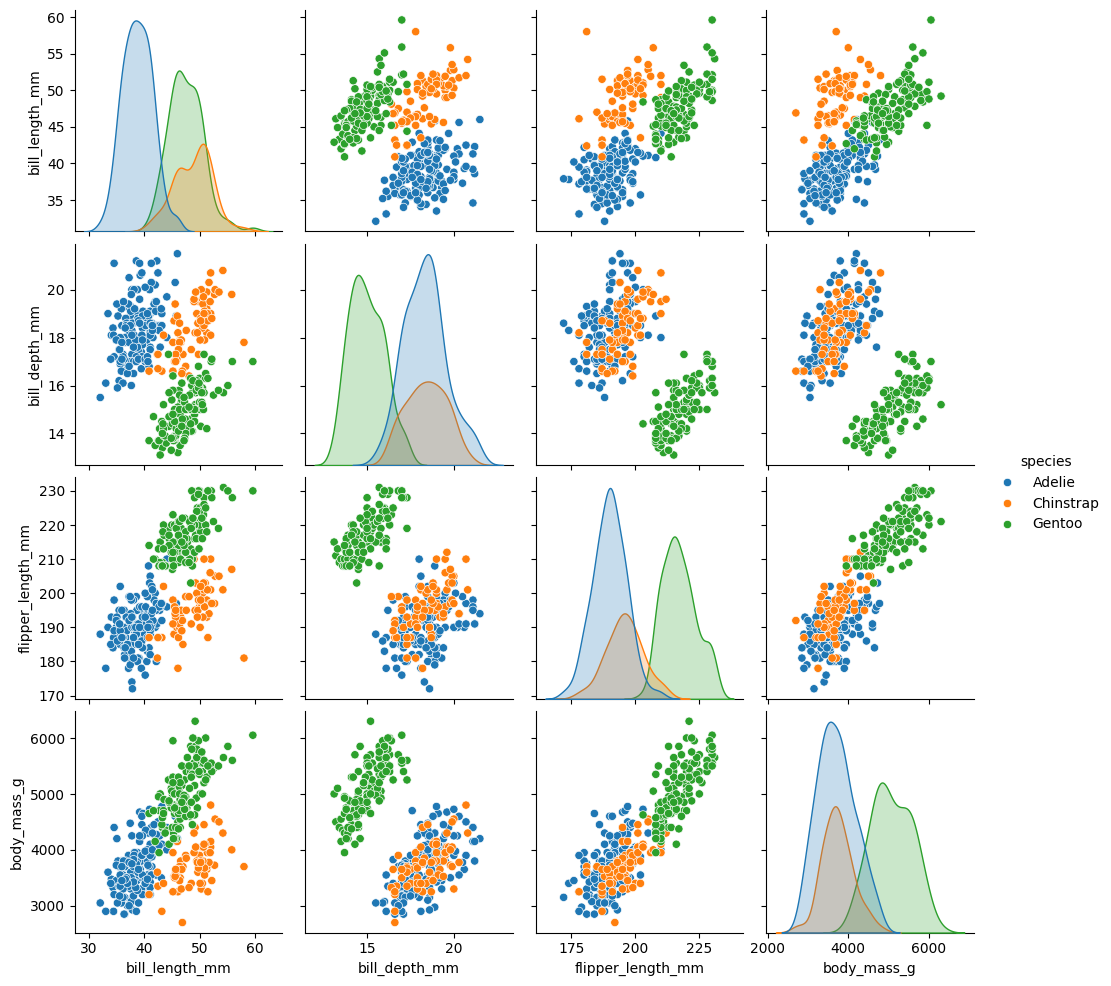

In [9]:
# Create pair plot, use 'species' as a hue
sns.pairplot(data=penguins, hue='species')

We can see differerence while using island as a hue instead of species. Here we can immidiately see that species as a hue seems much more cleaner and clearer distribution amongs the data than using island as a hue. That gives us a conclusion that there are more than one species living on the same island. Prove is below at the bottom of this task as a box plot.

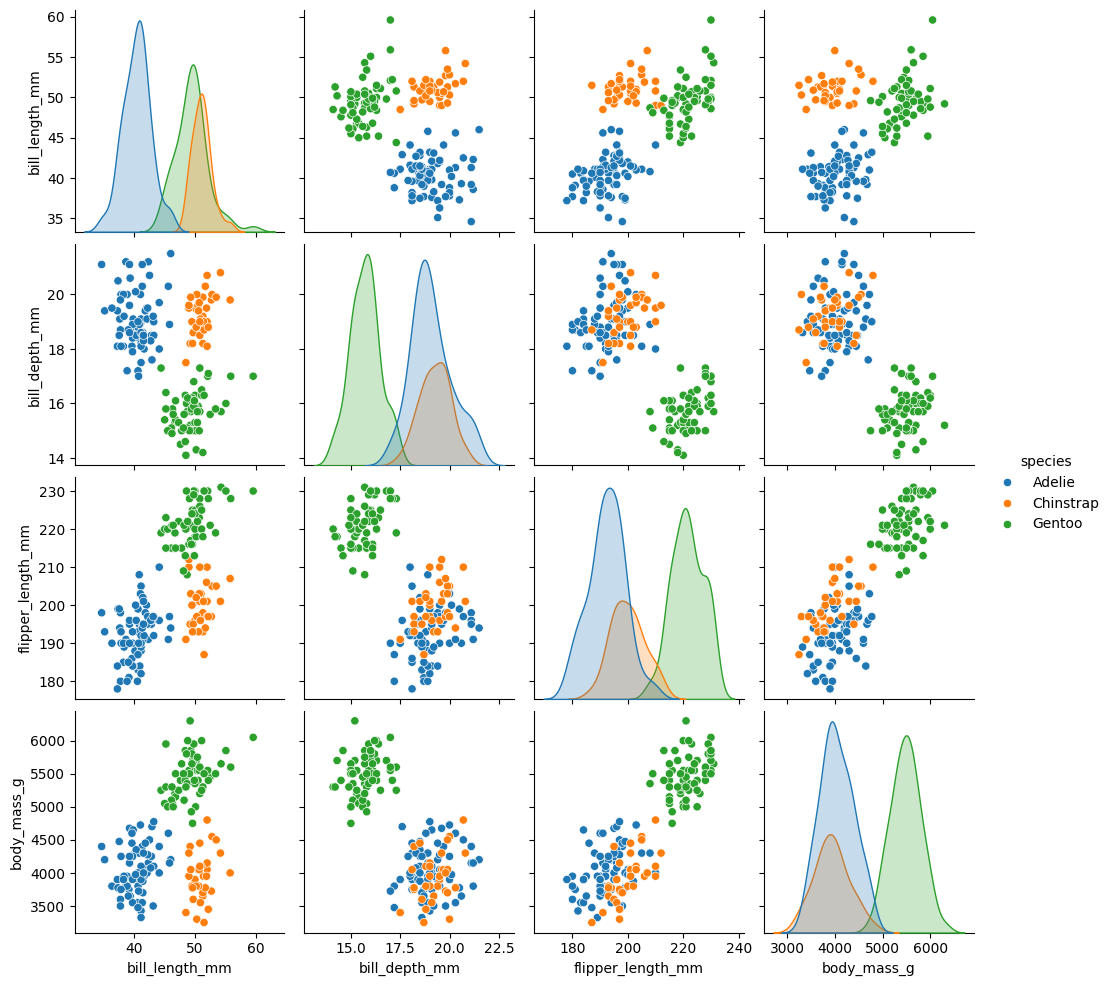

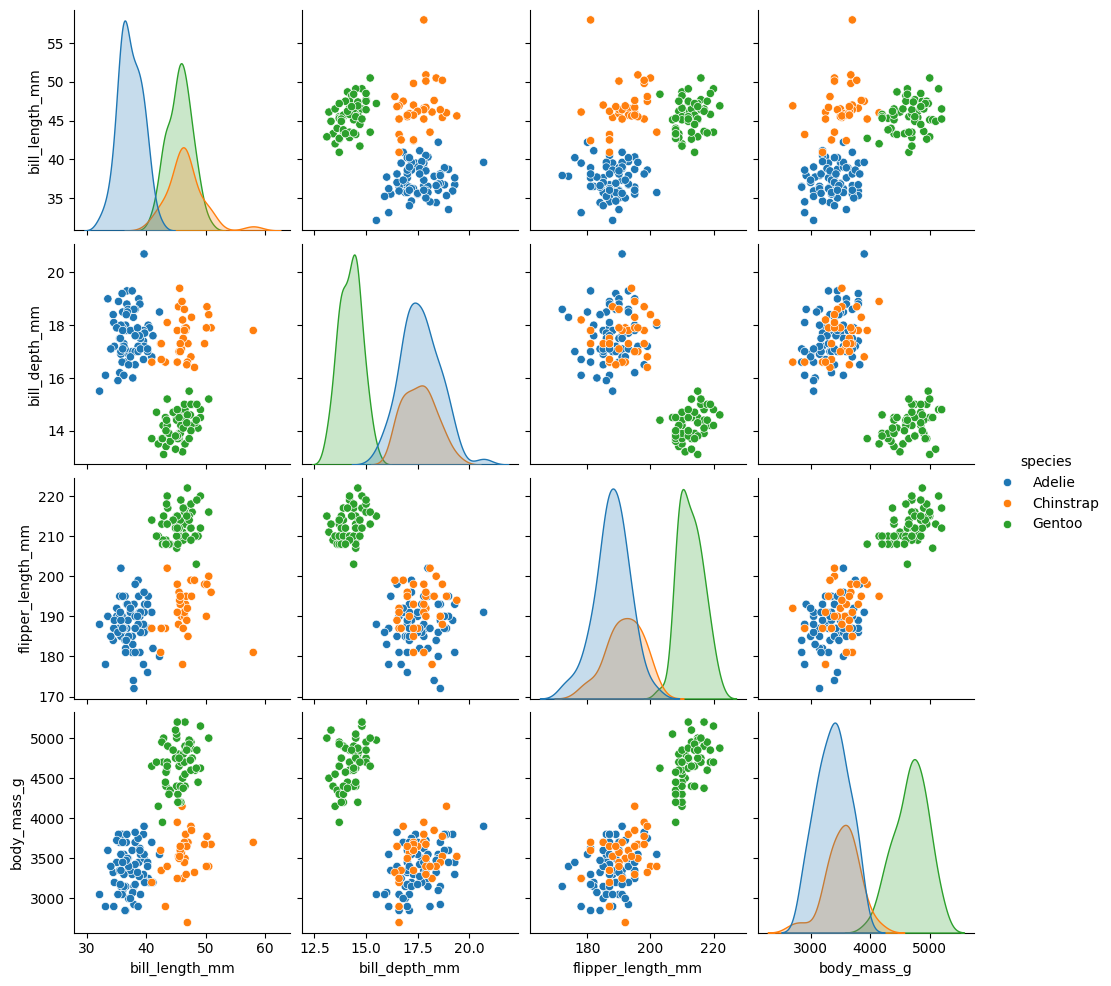

In [10]:
# Create pairplot for Male penguins, use island as a hue
sns.pairplot(data=penguins[penguins['sex'] == 'Male'], hue='species')

# Create pairplot for Female penguins, use island as a hue
sns.pairplot(data=penguins[penguins['sex'] == 'Female'], hue='species')
plt.show()

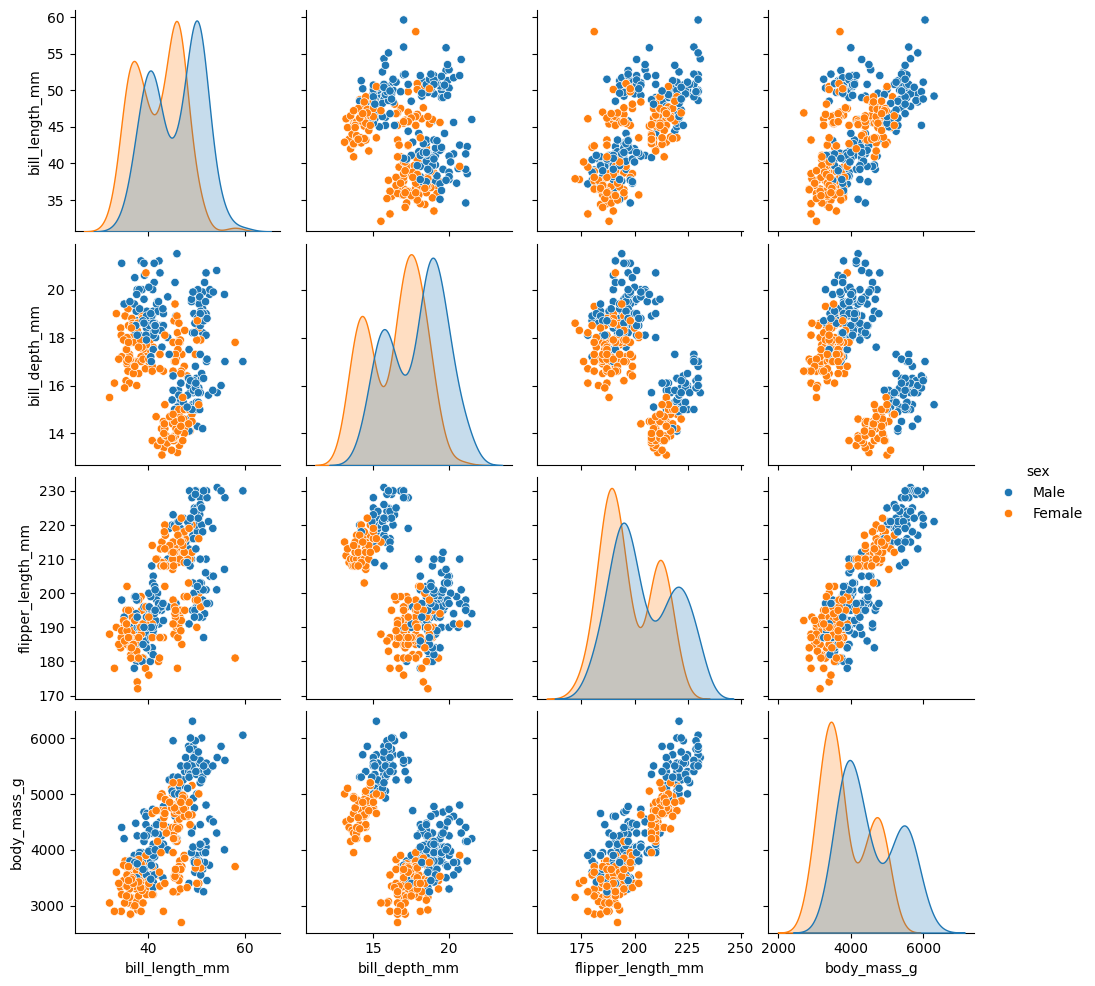

In [11]:
# Create a pair plot for sex column
sns.pairplot(penguins, hue="sex")

How much does the "sex"-column affect the result?

Here we can see that males are usally larger on average, Genthoo species being a exception as Female Genthoos are larger on average than male inviduals from ther species.

<ul>
    <li>Create a scatter plot for <b><i>bill_length_mm</i></b> and <b><i>flipper_length_mm</i></b>, use species as hue (try also island as hue)</li>
    <ul>
        <li style="color: red; font-weight: bold;">Which affects the result more, species or island?</li> 
    </ul>
</ul>

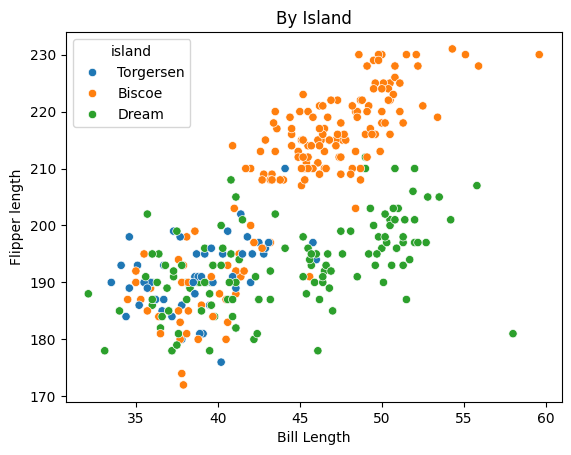

In [12]:
# Create Scatter plot for bill and flipper length_mm use species as a hue
scatter_species = sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue="island", data=penguins)
plt.title("By Island")
plt.xlabel("Bill Length")
plt.ylabel("Flipper length")
plt.show()

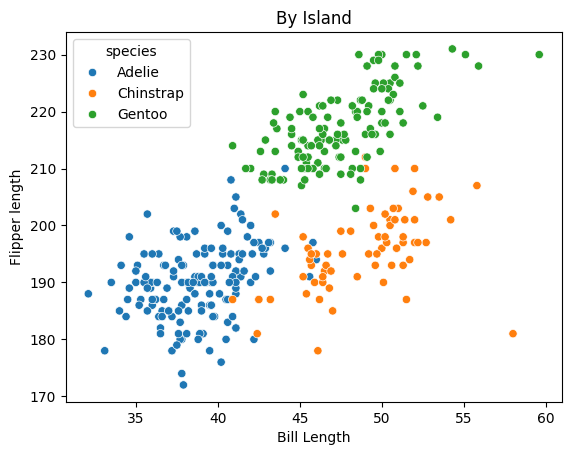

In [13]:
# Create Scatter plot for bill and flipper length_mm, use island as a hue
scatter_species = sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", hue="species", data=penguins)
plt.title("By Island")
plt.xlabel("Bill Length")
plt.ylabel("Flipper length")
plt.show()

Which provides the more different result, species or island?

In my opinion hue by species seems cleaner and has much clearer distribution, since penguins can live on the same island and there are genetically different from each other.

<ul>
    <li>Use box plots, violin plots or swarm plots:</li>
    <ul>
        <li>inspect the following information:</li>
        <ul>
            <li><b></i>flipper_length_mm</i></b></li>
            <li><b></i>bill_length_mm</i></b></li>
            <li><b></i>body_mass_g</i></b></li>
        </ul>
        <li>hue = island,  x= species</li>
        <ul>
            <li style="color: red; font-weight: bold;">What interesting insights/findings can you see in the data this way? </li>
            <li style="color: darkred; font-weight: bold;">Or in other words: "how the data works regarding the variables above?" </li>
        </ul>
    </ul>
</ul>

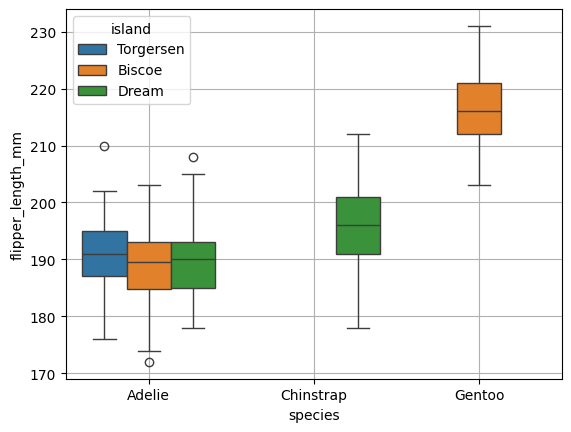

In [14]:
# Create Box plot for bill and flipper length_mm hue island
sns.boxplot(x="species", y="flipper_length_mm", hue="island", data=penguins)
plt.grid(True)
plt.show()

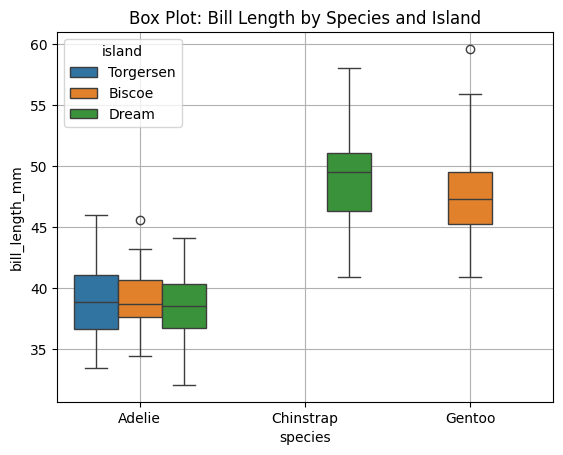

In [15]:
# Create box plot for bill length by island
sns.boxplot(x="species", y="bill_length_mm", hue="island", data=penguins)
plt.title("Box Plot: Bill Length by Species and Island")
plt.grid(True)
plt.show()

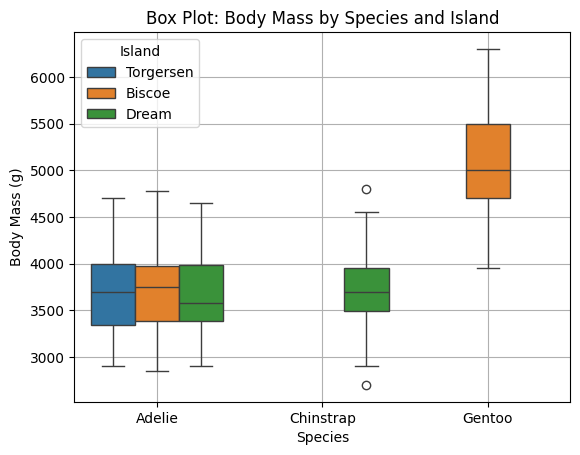

In [16]:
# Box plot for bill_length_mm
sns.boxplot(x="species", y="body_mass_g", hue="island", data=penguins,)
plt.grid(True)
plt.title("Box Plot: Body Mass by Species and Island")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.legend(title="Island")
plt.show()

Here we can see that Adelie lives on all three islands as Chinstrap and Gentoo both live on their own island.

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/penguins.png" />


<h2>Results and summary: </h2>
<li>Results and summary:
Species has a lot of impact to the physical measurements, of certain species we can also see correlation based on gender. There is a lot of factors we could use if we had more data gathered. You can also see that there could be other factors affecting the physical measurements, like food availability, living conditions etc which we can see from the data when using hue island and species.</li>

<h2>Ideas for futher improvements:</h2>
<li>Only thing, which I can think of is that dataset could be bigger and more data gathered from different categories, otherwise this was good. This is good dataset for beginners</li>

<h4><b>2. In this exercise, use the 'mpg' dataset from seaborn! </b></h4>
<b>-> sns.load_dataset('mpg')</b>
<p>
mpg stands for "miles per gallon", which is a common way to represent fuel consumption in USA.
</p>


<b>Clean up the data (instructions and tasks below)</b>

<ul>
<li>Create a new column: <b>"liters_per_100km"</b> , which converts the mpg to liters per 100 km</li>
<ul>
<li>You can Google the conversion formula easily: "miles per gallon to liters per 100km" or "How do you convert MPG to l 100km?"
</li>
<li>remove the original mpg –column after this</li>
</ul>

</ul>

<li>Data set name: mpg</li>
<li>Source: Seaborn module</li>
<li>Description: In this dataset we can see information about different types of cars, from the dataset we can see the miles per gallon/liters per 100km, cylinder amount, displacement, horsepower, weight, acceleration, model year and origin of the car.</li>
<li>Like I said about penguins dataset, this is quite small dataset, but there is a good amount of correlations and features we can use. There could always be more data to be analyzed, and data could be distributed differently like model could be put to it's own column, otherwise this was good dataset.</li>

In [17]:
# Load dataset 'mpg from seaborn
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<li>Remove the "name" -column</li>

In [18]:
# Create a new column: "liters_per_100km" , which converts
# the mpg to liters per 100 km, let's suppose that we use imperial,
# gallon, imperial formula = 282.48 / df['mpg], us gallon 235.21 / df['mpg]
# round the values to 1, it's more common to use it 4.7l/100km format
mpg['liters_per_100km'] = round(235.21 / mpg['mpg'], 1)
liters_per_100km = mpg['liters_per_100km']
mpg['liters_per_100km']

0      13.1
1      15.7
2      13.1
3      14.7
4      13.8
       ... 
393     8.7
394     5.3
395     7.4
396     8.4
397     7.6
Name: liters_per_100km, Length: 398, dtype: float64

<ul>
<li>After this, create a correlation matrix. There are two
columns that do not correlate as much as the others,
remove these two from the dataset <span style="color: red; font-weight: bold;">(mention also which columns you decided to remove and why)</span></li>
<ul>
<li style="font-weight: bold;">Create also a heatmap of the correlation matrix after you remove the two unneeded columns</li>
</ul>
</ul>

In [19]:
# Drop mpg and name column, change also variable name to dataframe
df = mpg.drop('mpg', axis=1)
df = df.drop('name', axis=1)
new_df = df

In [20]:
# Remove columns that don't correlate as much
df = df.drop('acceleration', axis=1)
df = df.drop('model_year', axis=1)
df.head()

,cylinders,displacement,horsepower,weight,origin,liters_per_100km
0,8,307.0,130.0,3504,usa,13.1
1,8,350.0,165.0,3693,usa,15.7
2,8,318.0,150.0,3436,usa,13.1
3,8,304.0,150.0,3433,usa,14.7
4,8,302.0,140.0,3449,usa,13.8


<Axes: >

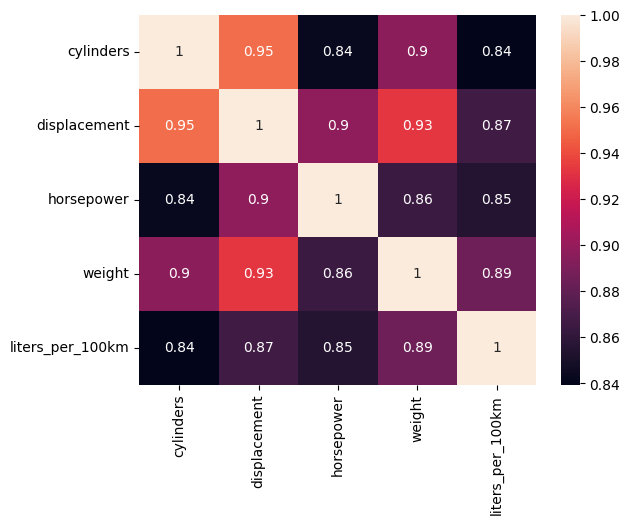

In [21]:
# Create correlation matrix, remove column that don't correlate as,
# much as others, remove these two from the data set
liters_per_100km_corr_matrix = df.corr(numeric_only=True)
sns.heatmap(data=liters_per_100km_corr_matrix, annot=True)

I chose to drop acceleration and model_year since they don't correlate as much as other columns.

<ul>
<li>There are three different columns that are strongly
connected to the car's efficiency (both power and
consumption), select one of them and remove the others
from the dataset
</li>
<ul>
<li style="color: red; font-weight: bold;">Which column is the best selection to indicate the
car’s efficiency, and why? (cylinders, horsepower or
displacement/engine size)</li>
<li style="color: darkred; font-weight: bold;">Remember: look at the big picture, also compare how well the variables correlate to other variables than just the consumption</li>
</ul>
</ul>

In [22]:
# Pick one from the 3 most correlating variables, select 1
# and remove others from the dataset, I chose liters_per_100km
columns_to_drop = ['cylinders', 'horsepower']

# Drop selected columns
df = df.drop(df[columns_to_drop], axis=1)
df

,displacement,weight,origin,liters_per_100km
0,307.0,3504,usa,13.1
1,350.0,3693,usa,15.7
2,318.0,3436,usa,13.1
3,304.0,3433,usa,14.7
4,302.0,3449,usa,13.8
...,...,...,...,...
393,140.0,2790,usa,8.7
394,97.0,2130,europe,5.3
395,135.0,2295,usa,7.4
396,120.0,2625,usa,8.4


<Axes: >

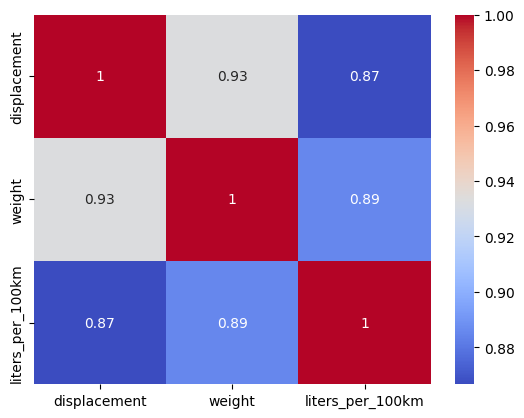

In [23]:
# Create heatmap from the correlation matrix after you dropped
# low correlating columns
df_corr_matrix = df.corr(numeric_only=True)
sns.heatmap(data=df_corr_matrix, annot=True, cmap='coolwarm')

Best selection from mentioned columns to indicate cars efficiency is displacement/engine size according to the dataframe. Horsepower and seems to have less effect for effect on efficiency, this means motor with more cylinders or horsepowers takes more gas.

Best columns to indicate cars efficiency seems to be displacement and weight, less weight means lesser effort/less gas to move the car, with bigger engine and low body weight car seems to be most effective.

In [24]:
# Pick one from the 3 most correlating variables, select 1
# and remove others from the dataset, I chose liters_per_100km
columns_to_drop = ['cylinders', 'horsepower']

# Drop selected columns
df = df.drop(df[columns_to_drop], axis=1)
df

KeyError: "None of [Index(['cylinders', 'horsepower'], dtype='object')] are in the [columns]"

<ul>
    <li><b>Finally, use the pair plot and hue (origin)</b></li>
    <ul>
        <li style="color: red; font-weight: bold;">Which origin country tends have bigger fuel consumption in
cars?</li>
<li><span style="color: red; font-weight: bold;">Which is generally the origin with lowest consumption?</span>
(more specific plots might be a good idea here, for example:
box plot, scatter plot etc., pandas functions are helpful too!)</li>
<li style="color: red; font-weight: bold;">What other features the cars seem to have that result into
bigger or lower consumption?</li>
    </ul>
</ul>

In [ ]:
sns.pairplot(data=df, hue='origin')

In [ ]:
sns.boxplot(data=df, x="origin", y="liters_per_100km")

In [ ]:
sns.barplot(data=df, x="origin", y="liters_per_100km")

In [ ]:
sns.pairplot(new_df, hue='origin')

In [ ]:
plt.figure(figsize=(10, 10))
plot = sns.lineplot(data=new_df, x="cylinders", y="liters_per_100km", hue="origin", ci=None)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))

In [ ]:
plt.figure(figsize=(10, 10))
plot = sns.lineplot(data=new_df, x="horsepower", y="liters_per_100km", hue="origin", ci=None)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))

In [ ]:
plt.figure(figsize=(25, 10))
plot = sns.lineplot(data=new_df, x="weight", y="liters_per_100km", hue="origin", ci=None)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1,1))

In [ ]:
sns.boxplot(new_df, x='cylinders', y='liters_per_100km', hue='origin')

In [ ]:
# Create heatmap from liters_per_100km_corr_matrix variable
sns.heatmap(data=liters_per_100km_corr_matrix, annot=True)

Model year and acceleration seems to have negative correlation for liters_per_100km, this could mean that older models seems to have higher gas consumption than newer models. The weight of the car seems to correlate for gas consumption, which could mean that larger vehichles have tendency of having higher fuel consumption, this also might be affect of larger vehicles having bigger engine with more cylinders and horsepower. Here we can see them having notably high correlation with weight of the car. It also could depend from the driver of the car, since faster acceleration seems to correlate with gas consumption.

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mpg.png" />


<h2>Results and summary: </h2>
<li>Results and summary:
Model year and acceleration seems to have negative correlation for liters_per_100km, this could mean that older models seems to have higher gas consumption than newer models. The weight of the car seems to correlate for gas consumption, which could mean that larger vehichles have tendency of having higher fuel consumption, this also might be affect of larger vehicles having bigger engine with more cylinders and horsepower. Here we can see them having notably high correlation with weight of the car. It also could depend from the driver of the car, since faster acceleration seems to correlate with gas consumption. There was good amount of correlations even with this amount of data.</li>

<h2>Ideas for futher improvements:</h2>
<li>Dataset could be bigger and in my opinion distributed better like I said, I would give model of the car their own column so data could be distributed and analyzed way easier and analyzation would be more accurate and better.</li>

<h4><b>3. csv-data, pandas and seaborn, groceries data</b></h4>


<p>
This dataset has been downloaded from <b><i>kaggle.com</i></b>.<br />
Download the "groceries.csv" from Moodle.
<br /><br />
Load the data by using pandas. (read_csv() etc.)
<br /><br />

<b>Note:</b> since this is an actual dataset from the internet, the data is in quite a rough format.

</p>

<li>Data set name: groceries(1).csv</li>
<li>Source: Source: csv-file from Moodle, https://moodle.eoppimispalvelut.fi/course/view.php?id=18645</li>
<li>Description: This dataset has information about prices of certain groceries throughout the years, we can see which prices went up and by using google I have found reasons why they could ahve gone up. Sometimes the price increase could be caused by inflation tho. Sunflower is only product, which price has almost had zero affection by almost anything, even the inflation.</li>
<li>This is small dataset like the others, the Month column caused some problems, but those were resolved by using function to separate it to different columns like Month and Date. Even while being small dataset this was good dataset in my opinion, little bit more challenging.</li>

<li>If you take a look at the data, you will notice three columns have NaN –
values. You can either remove these columns all together, or you can fill
the missing values with average values of that column. For example, for
the Fish -column you could do something like this:<br /><br />

<b>df['Fish'].fillna((df['Fish'].mean()), inplace=True)</b><br /><br />
In this case, food is the name of the DataFrame we just got from the csv-file. Do this same operation to the two other columns with missing
values.</li>

In [ ]:
import calendar

In [25]:
# Load dataset 'mpg from seaborn
groceries = pd.read_csv("groceries (1).csv")

# Read dataset, I use only the variable since I like to read end and tail at the same time
groceries

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,May-20,0.51,0.21,0.08,0.14,2.05,0.0053,0.83,0.58,NaN,0.0335,0.1120,NaN,NaN,1.97,1.42
356,Jun-20,0.52,0.20,0.08,0.15,2.05,0.0060,0.92,0.66,NaN,0.0346,0.1124,NaN,NaN,1.86,1.42
357,Jul-20,0.48,0.20,0.08,0.15,1.99,0.0060,0.89,0.69,NaN,0.0335,0.1036,NaN,NaN,1.78,1.49
358,Aug-20,0.50,0.20,0.08,0.15,1.30,0.0064,0.98,0.76,NaN,0.0331,0.1021,NaN,NaN,2.00,1.60


In [ ]:
# Check for missing values
groceries.isnull().sum()

In [ ]:
# Fill missing values, change groceries variable name to df for easier and faster coding
df = groceries
df["Sunflower-oil"].fillna((df["Sunflower-oil"].mean()), inplace=True)
df["Pork"].fillna((df["Pork"].mean()), inplace=True)
df["Fish"].fillna((df["Fish"].mean()), inplace=True)

In [ ]:
df["Month"].value_counts()

<ul>
<li>In this data, the date column is a bit difficult to use, since it's not
completely in numerical format. Split the Month-column so, that you
have two different columns: Month and Year</li>
<ul>
<li>For month, use a numeric format 1-12</li>
<li>For year, use the full year 1990-2020</li>
<li>Check out the examples in Moodle, this one is a bit tricky, but
very neat to know how it's done!</li>
</ul>
</ul>

In [ ]:
# Split Month and Year for functions to go through them
df[['Month', 'Year']] = df['Month'].str.split('-', expand=True)

In [ ]:
# Define to change month in df["Month"] with numbers, by using calendar module 
def change_month(row):
    return list(calendar.month_abbr).index(row['Month'])


# Define function to fix year columns to years from spoken language years
def fix_year(row):
    current_year = datetime.now().year % 100
    year = int(row["Year"])
    if 00 <= year <= current_year:
        return int(f"20{row['Year']}")
    elif 90 <= year <= 99:
        return int(f"19{row['Year']}")
    

# Apply functions for df["Year"] and df["Month"] columns
df["Month"] = df.apply(change_month, axis=1)
df["Year"] = df.apply(fix_year, axis=1)
df.head()

<li>After the cleanups, create a correlation matrix of the data. Create a heatmap on the correlations as well.
<br /><br />
<span style="color: red; font-weight: bold;">Which grocery stands out?</span> (i.e. there seems to be one grocery item
whose price doesn't follow other groceries at all)
</li>

In [ ]:
# Create groceries list to see correlation between only groceries
groceries_list = ['Rice', 'Wheat', 'Barley', 'Corn', 'Peanuts', 'Sugar',
       'Coconut-oil', 'Palm-oil', 'Sunflower-oil', 'Chicken', 'Beef', 'Pork',
       'Fish', 'Tea', 'Coffee'
       ]

In [ ]:
# Create correlation matrix for the data
groceries_corr_matrix  = round(df[groceries_list].corr(), 2)
plt.figure(figsize=(10, 10))
# Create heatmap for the correlation matrix
sns.heatmap(data=groceries_corr_matrix , annot=True)
plt.show()

Here we can see that Sunflower oil is the only one with barely any correlation with any other variable. It could be that it has not had any significant changes to it's price through the years.

<li style="color: red; font-weight: bold;">Which groceries seem to correlate to each other's prices? What do they have in common?</li>

In [ ]:
# Create list to store variables from loop that finds highly correlated groceries
highly_correlated_pairs = []

# Create for loop to go through correlation matrix and find higly correlated groceries
for i in range(len(groceries_corr_matrix.columns)):
    for j in range(i):
        groceries_coefficient = groceries_corr_matrix.iloc[i, j]

        # Check if the correlation coefficient exceeds the threshold
        if abs(groceries_coefficient) > 0.7:
            grocery1 = groceries_corr_matrix.columns[i]
            grocery2 = groceries_corr_matrix.columns[j]
            highly_correlated_pairs.append((grocery1, grocery2))

# Create display highly correlated pairs
if len(highly_correlated_pairs) > 0:
    print("Highly correlated column pairs:")
    for pair in highly_correlated_pairs:
        print(pair)
else:
    # If no highly correlated prices print: No highly correlated column pairs found
    print("No highly correlated pairs found.")

In [ ]:
# Create list to store variables from loop that finds highly correlated groceries
highly_correlated_pairs = []

# Create for loop to go through correlation matrix and find higly correlated groceries
for i in range(len(groceries_corr_matrix.columns)):
    for j in range(i):
        groceries_coefficient = groceries_corr_matrix.iloc[i, j]

        # Check if the correlation coefficient exceeds the threshold
        if abs(groceries_coefficient) > 0.7:
            grocery1 = groceries_corr_matrix.columns[i]
            grocery2 = groceries_corr_matrix.columns[j]
            highly_correlated_pairs.append((grocery1, grocery2))

# Create display highly correlated pairs
if len(highly_correlated_pairs) > 0:
    print("Highly correlated column pairs:")
    for pair in highly_correlated_pairs:
        print(pair)
else:
    # If no highly correlated prices print 
    print("No highly correlated pairs found.")

These highly correlating column pairs have incommon that, they are all highly used in basic cooking in home, but also in some restaurants. Most of them are crops, used in cereals or usually consumed while eating/drinking breakfast. Some can also be found from sweets like sugar and palm oil.

These are also considered "basic" nececcities:

Crops: Rice, Wheat, Barley, Corn

Bread: Wheat, Barley, Corn, Palm oil, Sugar Cereals: Crops, Palm oil, Sugar, Peanuts Sweets: Sugar, Palm oil, Peanuts Meats: Beef, Chicken Within breakfast materials: Crops, Peanuts, Sugar, Palm Oil. Drinkable: Coffee

Extra

In [ ]:
# Create correlation matrix for the data
groceries_corr_matrix  = round(df.corr(), 2)
plt.figure(figsize=(10, 10))
# Create heatmap for the correlation matrix
sns.heatmap(data=groceries_corr_matrix , annot=True)
plt.show()

In [ ]:
# Create pivot table with years as rows, months as columns, and average prices as values
pivot_table = df.pivot_table(index="Year", columns="Month", aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table)
plt.title("Average Prices of Food Items Over Time")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

In [ ]:
# Create price_peaks list to add grocery items peak year from the loop below
price_peaks = {}

# Create for loop to go through grocery items in groceries list and get the year of their peak price
for grocery_item in groceries_list:
    # Find the index of the food item in the DataFrame columns
    food_index = df.columns.get_loc(grocery_item)
    # Identify the year with the highest price for the food item
    peak_year = df.loc[df.iloc[:, food_index].idxmax(), "Year"]
    peak_price = df.iloc[:, food_index].max()
    price_peaks[grocery_item] = {"Year": peak_year, "Price": peak_price}

# Display food item and it's price peak
for grocery_item, peak_year in price_peaks.items():
    print(f"{grocery_item} price peak: {peak_year['Year']}")

In [ ]:
# Create groceries list to see correlation between only groceries
groceries_list_mid = ['Rice', 'Wheat', 'Barley', 'Corn', 'Peanuts', 'Sugar',
       'Coconut-oil', 'Palm-oil', 'Sunflower-oil', 'Chicken', 'Beef', 'Pork',
        'Coffee', 'Tea'
       ]

# Set figsize to 10, 10 to make lineplot more readable
plt.figure(figsize=(10, 10))

# Create for loop to create lineplot for groceries in groceries_list, add grocery label
for grocery in groceries_list_mid:
    sns.lineplot(data=df, x='Year', y=grocery, label=grocery)

# Put labels "Year", "Price" to indicate price each year
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Add month to the year label
plt.show()

In [ ]:
# List of groceries to plot
groceries_high_list = ['Fish']

# Create a line plot for each grocery in the groceries_high_list
for grocery in groceries_high_list:
    sns.lineplot(data=df, x='Year', y=grocery, label=grocery)

# Add labels for the axes
plt.xlabel('Year')
plt.ylabel('Price')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

I did some googling and found out that and prices went up, because of global population rising and sharp decline in food crop production. This happened, because Crude Oil prices started rising significantly in 2008 February. This is why Corn, Wheat and Rice prices went up.

Corn and Barley went up in 2012, because of drought in United States, which produces significant portion of Corn and Barley in the Global Market. Dryness was caused by heatwave.

Other groceries that went up, relating to weather Coconut oil, Palm oil, Sugar and Peanuts.

Meats price went up, because of their high cost to produce and shortage of meat producers, because of retirement.

Links: crops/corn-and-other-feed-grains/feed-grains-sector-at-a-glance/

https://www.alberta.ca/agri-news-us-corn-imports-and-the-barley-market https://www.bls.gov/opub/ted/2012/ted_20121128.htm https://www.bettermarkets.org/sites/default/files/The%20Accidental%20Hunt%20Brothers%20-%20Part%203.pdf https://economictimes.indiatimes.com/markets/commodities/coconut-oil-prices-slip-on-tepid-demand/articleshow/11644467.cms?from=mdr https://www.cbc.ca/news/canada/new-brunswick/meat-farmers-say-2014-year-to-remember-after-jump-in-prices-1.2885284
Fish prices rose, because of higher demand and inflation sky rocketed to 9.3% in August 2017.

https://www.thecaterer.com/news/foodservice/fish-prices-leap-23-as-food-inflation-spikes

Coffee prizes went up because of Climatorial factors in Brazil, main producers of coffee. It was caused by double frosting during the summer of 1994.

https://www.nytimes.com/1994/06/28/business/coffee-futures-soar-25-biggest-daily-rise-in-7-years.html

<b>Bonus task:</b>
<p>Sometimes data can also reflect history! For example, "Corn" and some
other foods seem to have a notable peak in its price in one of the years.
Find this year, and Google if you can find a reason for the price peak (for
example, search: "us corn expensive XXXX". <span style="color: red; font-weight: bold;">Can you find any other food
that has relation to a real world event in a similar in this dataset?</span></p>
<p><b>Tip:</b> use pivot table and heatmap! Remember also, the first year in the
dataset might show as blank white, that means there's no data. You
should also split the date</p>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/food.png" />


<h2>Results and summary: </h2>
<li>Results and summary:
There was good reasons why certain products price went up, I found some good reasons by using google and they are listed above.</li>

<h2>Ideas for futher improvements:</h2>
<li>This dataset brought it's own challenges even while being small, I found ways to do the given tasks and even some more  of my personal analyzation. Dataset was good, the data could have been distributed differently from the start, but it was good practice to learn to use functions in data analyzation.</li>

<h4><b>4. csv-data, pandas and seaborn, mobile phone data, regression plots</b></h4>


<p>This dataset has been downloaded from <b><i>kaggle.com</i></b> and modified. <br />
Download the "mobilephones.csv" from Moodle.  Load the data by using pandas.  (read_csv() etc.)</p>

<p>
Regression plots (<b>lmplot()</b> in seaborn) are often extremely useful in finding more insight and "hidden connections" in your data. </p>

<p>
Remember to also check out the confidence interval, if it's wide around the regression line = there's usually fluctuation within the values. <br />Narrow line => the linear connection is quite evident.</p>


<li>Data set name: mobilephones(1).csv</li>
<li>Source: Source: csv-file from Moodle, https://moodle.eoppimispalvelut.fi/course/view.php?id=18645</li>
<li>Description: This dataset includes information about different type of mobilephones, from the dataset we can see data distributed by Brand, Battery Capacity, Ram, Screensize and Price.</li>
<li>In my opinion dataset was good, it was small tho, there could be more columns like model and popularity. This affects the analyzation process due to we have less correlations and features and to use.</li>

<b>With the mobile phone data, do the following:</b>

In [ ]:
# Load dataset 'mpg from seaborn
mobilephones = pd.read_csv("mobilephones (1).csv")

# Read dataset, I use only the variable since I like to read end and tail at the same time
mobilephones

<ul>

<li>Use regression plot for RAM and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>



</ul>

In [ ]:
# Use regplot for RAM and Price, no hue
sns.lmplot(data=mobilephones, x='RAM', y='Price')

Ram amount seems to correlate with price quite well, ram capacity equals to higher price. This does also seem like there could be other factors since price isn't same for all ram amounts, this could be cause of brands and their models, better brand and model with better ram -> higher price.

<ul>
<li>Use regression plot for RAM and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [ ]:
# Use regplot for RAM and Price, no hue
sns.lmplot(data=mobilephones, x='RAM', y='Price', hue="Brand")

By using Brand as hue we can see that some brands are definitely more expensive. Apple seems to be most expensive compared to Ram amount, while Xiomi seems to be most affordable. Samsung seems to be only one with Ram capacity over 12, and quite low price compared to others like most expensive one Apple.

End result: Ram seems to highly correlate with prize.

<ul>
<li>Use regression plot for BatteryCapacity and Price, no hue</li>
<ul>
    <li style="color: red; font-weight: bold;">What is the correlation based on the regression line?</li>
</ul>


</ul>

In [ ]:
# Use regplot for RAM and Price, no hue
sns.lmplot(data=mobilephones, x="BatteryCapacity", y='Price')

Battery amount seems to have quite noticable negative correlation to price, there are exceptions, but we might gain more knowledge using brand as hue.

<ul>
<li>Use regression plot for BatteryCapacity and Price, hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">How is the correlation different when compared to without hue?</li>
</ul>
</ul>

In [ ]:
# Use regplot for BatteryCapacity and Price, hue on Brand
sns.lmplot(data=mobilephones, x='BatteryCapacity', y='Price', hue='Brand')

Here we can see that BatteryCapacity seems to have noticable or even high correlation with prize with certain brands like Apple and Asus. Brands like Samsung and Xiomi seems to have negative correlation with prize and BatteryCapacity. There are some outliers, which could indicate that same model with higher prize tag has better BatteryCapacity otherwise prize seems to have mostly negative correlation to prize, as most of the data has negative correlation(Samsung, Xiomi) to the prize.

In [ ]:
# Use regplot for ScreenSize and Price, without hue
sns.lmplot(data=mobilephones, x='ScreenSize', y='Price')

Here it seems like ScreenSize barely has any correlation with prize, seems like ScreenSize doesn't have any significant value with phones having quite similar prices no matter the size. There are still some more expensive with higher prize, which could indicate about brand and model differences with bigger ScreenSize with price.

<ul>
<li><b>Bonus task:</b> Use regression plot for ScreenSize and Price, without and with hue on Brand</li>
<ul>
    <li style="color: red; font-weight: bold;">Compare the correlations with and without hue. Is there a difference?</li>
</ul>
</ul>

In [ ]:
# Use regplot for ScreenSize and Price, with hue on Brand
sns.lmplot(data=mobilephones, x='ScreenSize', y='Price', hue='Brand')

As we thought, ScreenSize seems to eventually have notable correlation with prize, especially high correlation with Samsung and Xiomi. For brands like Apple and Asus there seems to notable correlation. Blackberry seems to have even negative correlation.

End result: After all ScreenSize does affect the prize, having quite high correlation with bigger ScreenSize, bigger the prize.

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/mobilephone.png" />

<h2>Results and summary: </h2>
<li>Results and summary:
Apple is propably the most overrated brand due to it's low ram, screensize and batterycapacity correlation to the price, Asus also seems little bit overrated. Underrated brands are Xiomi and Samsung, their price correlates really well to ram, screensize and batterycapacity compared to Apple and Asus.</li>

<h2>Ideas for futher improvements:</h2>
<li>Data could be distributed way better, but it I got the tasks done. I would be interested about how the popularity and model has affects to the price and other data variables.</li>


<h2><b>Advanced extra tasks for extra points (varying challenges, some require Googling):</b></h2>

<ul>
<li>1. <b>seaborn:</b> Try out Boxenplot and/or Dendrogram in any of the previous
dataset exercises. Do these plot types provide some interesting info on
the data? (Google for examples on these plot types)</li>
<ul>
<li>You may also consider some other plots, for example:
<b>displot, catplot, relplot</b></li>
</ul>
</ul>

In [ ]:
# Load dataset penguins
penguins = sns.load_dataset('penguins')

# Display the dataset
penguins

In [ ]:
# Create boxenplot for 
sns.boxenplot(x="species", y="flipper_length_mm", data=penguins)

<ul>
<li><b>2. Use the "titanic" dataset from the seaborn datasets
(sns.load_dataset('titanic')).</b> Find out the features of a typical person
that survived or did not survive the sinking of Titanic.</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/titanic.png"/>

In [ ]:
# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the titanic df
titanic_df

In [ ]:
# Desribe typical person who survived
survived_data = titanic_df[titanic_df['survived'] == 1]
typical_survivor = survived_data.describe()

# Display the information to the user
print("Survived:")
typical_survivor

In [ ]:
# Describe typical person who did not survive
not_survived_data = titanic_df[titanic_df['survived'] == 0]
typical_non_survivor = not_survived_data.describe()

# Display the information to the user
print("Not survived:")
typical_non_survivor

In [ ]:
print("Typical Person not surviving", typical_non_survivor.iloc[1])
print("\nTypical Person surviving", typical_survivor.iloc[1])

<li><b>3. Use the "taxis" dataset from the seaborn datasets
(sns.load_dataset('taxis')).</b> Find out any correlations or interesting
behaviors based on any columns in the data (color, payment,
pickup_borough, dropoff_borough etc.)
<br /><br />

<b>Notes and ideas to try out:</b><br />
Consider removing the pickup_zone and dropoff_zone, since there are
way too many alternatives. Borough is the larger area in question, which
can be helpful while grouping data (hue!)<br /><br />
How about pickup and dropoff times, should they be modified? From
taxi point of view, is the weekday and time of day (morning, day,
evening, night) more interesting than the actual dates?
<br /><br />
These are just ideas, you're free to come up with your own ideas
regarding the data!</li>
<br />
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/taxis.png"/>


In [ ]:
# Load dataset taxis
taxis_df = sns.load_dataset('taxis')  

# Display the dataset
taxis_df

In [ ]:
# Drop pickup_zone and dropoff_zone columns
taxis_data = taxis_df.drop(['pickup_zone', 'dropoff_zone'], axis=1)

In [ ]:
# Create correlation matrix for the dataset
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
correlation_matrix

In [ ]:
# Display a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

#Correlation Heatmap of Taxi Dataset
plt.show()

From this heatmap we can see that Distance, Fare and Total correlates perfectly with each other while tip and tolls have considarable correlation with everything but not significant.

<ul>
<li><b>4. Try out any of the previous examples and exercises by using any or many
of the following additional plotting libraries:<br /><br />
</li>
<ul>
<li><b>Matplotlib (this is the most common in addition to seaborn,
especially regarding machine learning, recommended to learn)</b><br />
<a href="https://matplotlib.org/stable/tutorials/index.html#introductory">https://matplotlib.org/stable/tutorials/index.html#introductory</a><br /><br /></li>
<li><b>Plotly</b><br />
<a href="https://plotly.com/python/getting-started/">https://plotly.com/python/getting-started/</a><br /><br /></li>
<li><b>Bokeh</b><br /><a href="https://docs.bokeh.org/en/latest/docs/user_guide.html">https://docs.bokeh.org/en/latest/docs/user_guide.html</a>
<br /><br /></li>
</ul>
</ul>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_3/charts.png" />

In [ ]:
# code for the advanced extra task, you can also create a separate notebook for this 
# (might be a better idea, since a new dataset always adds quite much new code)

<ul>
<li><b>5. Try out any of the datasets below, or find yourself an interesting csvdataset from kaggle.com!  </b><br>

Use all your skills in numpy, pandas and seaborn, and find out features in
the data. <br ><br />
<b>Was there something that is surprising in the dataset? What
interesting correlations did you find?</b>
<br><br>
<b>Some interesting datasets, examples (you can find you own too!):</b>
</li>
<ul>
<li><a href="https://www.kaggle.com/anamvillalpando/world-happiness-ranking">https://www.kaggle.com/anamvillalpando/world-happiness-ranking</a></li>
<li><a href="https://www.kaggle.com/sakshigoyal7/credit-card-customers">https://www.kaggle.com/sakshigoyal7/credit-card-customers</a></li>
<li><a href="https://www.kaggle.com/lucabasa/dutch-energy">https://www.kaggle.com/lucabasa/dutch-energy</a></li>
<li><a href="https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv">https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks?select=data_w_genres.csv</a></li>
<li><a href="https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv">https://www.kaggle.com/kboghe/android-apps-metadata?select=Android+apps+csv.csv</a></li>
<li><a href="https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv">https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv</a><br /><br /></li>
</ul>
<li><b>Note:</b> These datasets can be quite rough to handle at first, feel free to
ask tips from your instructor if some dataset interests you!</li>
</ul>

<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_2/es2_5.png" />

In [ ]:
# do any Kaggle.com -related extra tasks in their own Jupyter notebooks for easier coding